In [267]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import os
import warnings
warnings.filterwarnings("ignore")

In [268]:
os.chdir('/content/drive/MyDrive/Time Series')

In [269]:
df = pd.read_excel('Serum Sales Data.xlsx')

In [270]:
df.head()

,Date,Sales
0,2019-06-01,218
1,2019-06-02,161
2,2019-06-03,139
3,2019-06-04,144
4,2019-06-05,143


In [271]:
df.dtypes

Date     datetime64[ns]
Sales             int64
dtype: object

In [272]:
df['Date'] = pd.to_datetime(df['Date'])

In [273]:
df['monthname'] = df['Date'].dt.month_name()

In [274]:
df.shape

(212, 3)

In [275]:
df['time'] = np.arange(1,213,1)

In [276]:
df.head()

,Date,Sales,monthname,time
0,2019-06-01,218,June,1
1,2019-06-02,161,June,2
2,2019-06-03,139,June,3
3,2019-06-04,144,June,4
4,2019-06-05,143,June,5


In [277]:
df2 = pd.get_dummies(df['monthname'], drop_first = True)

In [278]:
df2.tail()

,December,July,June,November,October,September
207,1,0,0,0,0,0
208,1,0,0,0,0,0
209,1,0,0,0,0,0
210,1,0,0,0,0,0
211,1,0,0,0,0,0


In [279]:
dff = pd.concat([df, df2], axis = 1)

In [280]:
dff.head()

,Date,Sales,monthname,time,December,July,June,November,October,September
0,2019-06-01,218,June,1,0,0,1,0,0,0
1,2019-06-02,161,June,2,0,0,1,0,0,0
2,2019-06-03,139,June,3,0,0,1,0,0,0
3,2019-06-04,144,June,4,0,0,1,0,0,0
4,2019-06-05,143,June,5,0,0,1,0,0,0


In [281]:
train = dff.iloc[:80]
test = dff.iloc[80:110]
train.shape, test.shape

((80, 10), (30, 10))

In [282]:
xtrain = train[['time', 'December','July', 'June', 'November', 'October', 'September']].values
ytrain = train['Sales'].values

In [283]:
xtest = test[['time', 'December','July', 'June', 'November', 'October', 'September']].values
ytest = test['Sales'].values

In [284]:
xtrain.shape, ytrain.shape

((80, 7), (80,))

In [285]:
xtest.shape, ytest.shape

((30, 7), (30,))

In [286]:
import seaborn as sb

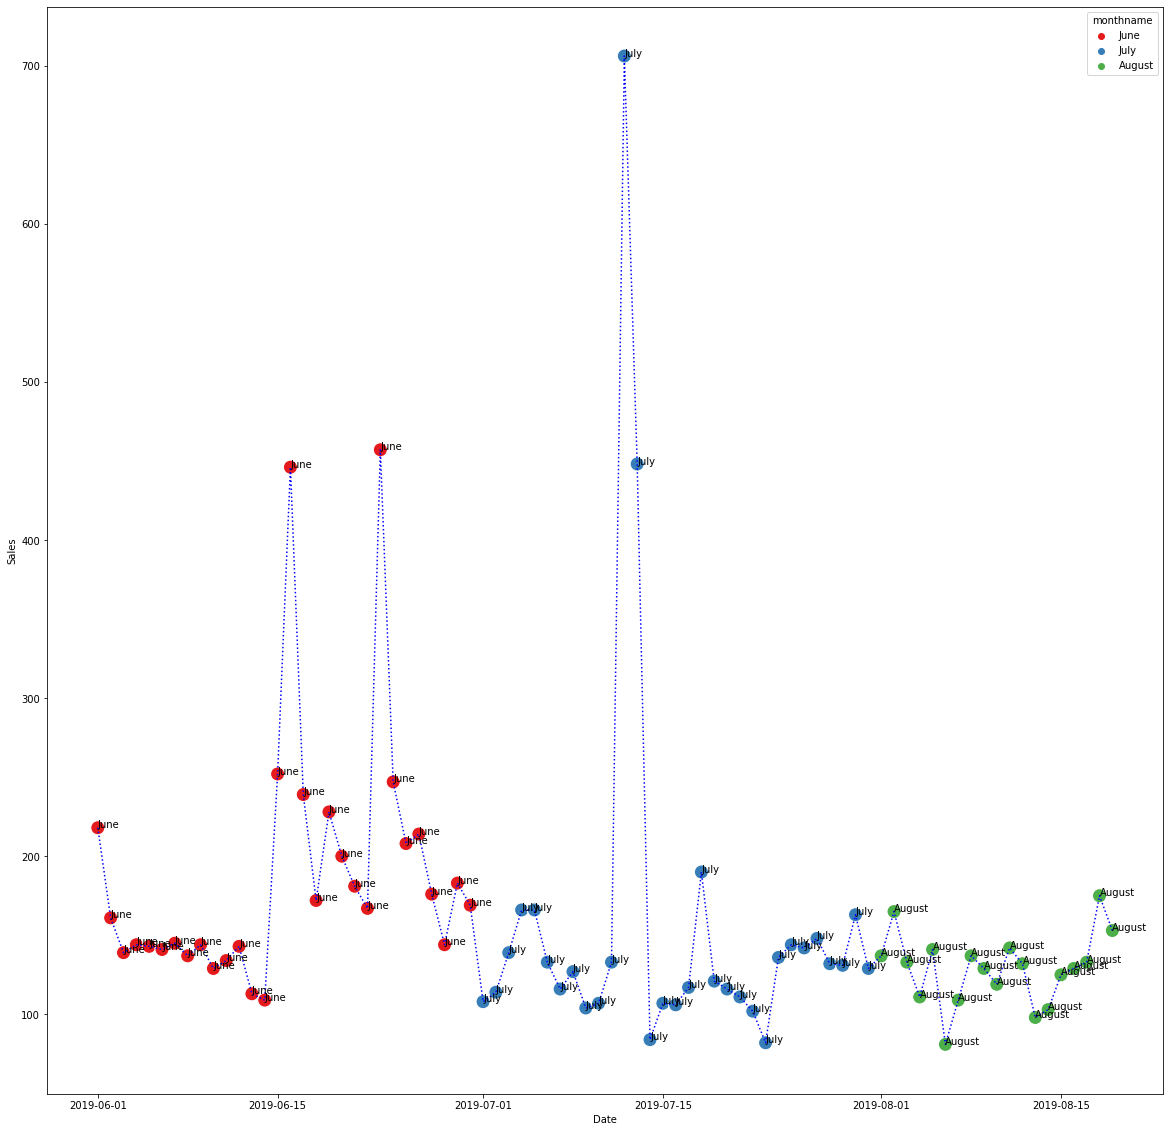

In [287]:
plt.figure(figsize = (20,20))
#plt.plot(train['Date'], ytrain, 'bo:')
plt.plot(train['Date'], ytrain, 'b:')
sb.scatterplot('Date', 'Sales', hue = 'monthname', data = train, s = 200, palette = 'Set1')
for i in range(len(train['monthname'])):
  plt.text(df['Date'][i], df['Sales'][i], df['monthname'][i])
plt.show()

#Linear Regression with Time Consideration

In [288]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [289]:
model.fit(xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [290]:
yfit = model.predict(xtrain)

In [291]:
ypred = model.predict(xtest)

In [292]:
#calculate CI
error = ytrain - yfit
SE = error.std()
ME = 1.96 * SE
ME

173.69395744245998

In [293]:
upper = ypred + ME
lower = ypred - ME

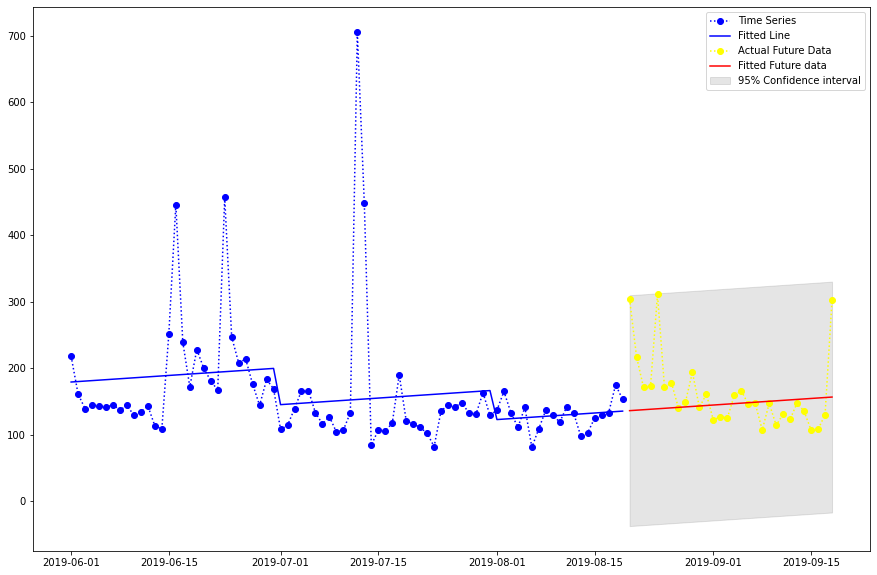

In [294]:
plt.figure(figsize = (15,10))
plt.plot(train['Date'], ytrain, 'bo:')
plt.plot(train['Date'], yfit, 'b')
# forcasting date
plt.plot(test['Date'], ytest, 'o:', color = 'yellow')
plt.plot(test['Date'], ypred, color = 'red')
plt.fill_between(test['Date'], (upper), (lower), alpha = 0.1, color = 'black')
plt.legend(['Time Series','Fitted Line', 'Actual Future Data', 'Fitted Future data', '95% Confidence interval'])
plt.show()

#Linear Regression Model

In [295]:
xtrain = train[['time']].values
ytrain = train['Sales'].values
xtrain.shape, ytrain.shape

((80, 1), (80,))

In [296]:
xtest = test[['time']].values
ytest = test['Sales'].values
xtest.shape, ytest.shape

((30, 1), (30,))

In [297]:
model.fit(xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [298]:
yfit = model.predict(xtrain)

In [299]:
ypred = model.predict(xtest)

In [300]:
#calculate CI
error = ytrain - yfit
SE = error.std()
ME = 1.96 * SE
ME

175.75068089142522

In [301]:
upper = ypred + ME
lower = ypred - ME

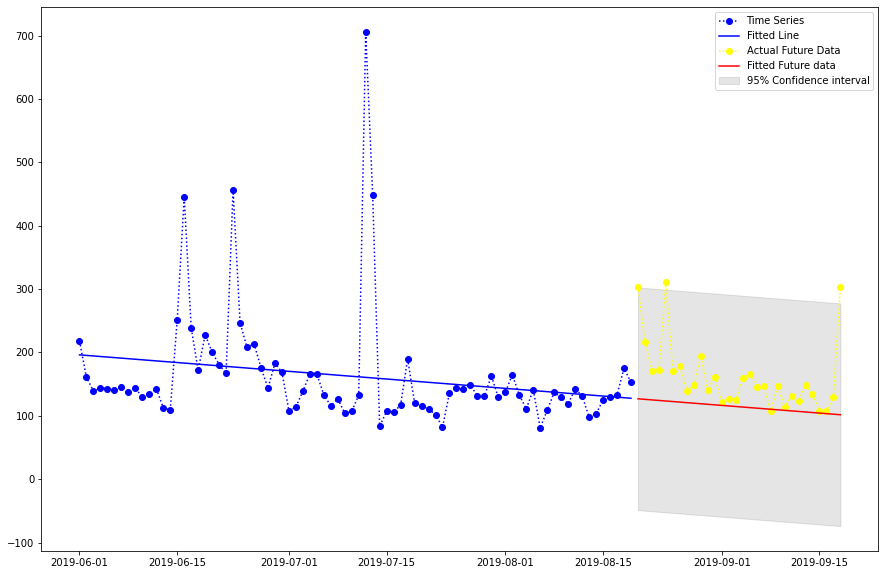

In [302]:
plt.figure(figsize = (15,10))
plt.plot(train['Date'], ytrain, 'bo:')
plt.plot(train['Date'], yfit, 'b')
# forcasting date
plt.plot(test['Date'], ytest, 'o:', color = 'yellow')
plt.plot(test['Date'], ypred, color = 'red')
plt.fill_between(test['Date'], (upper), (lower), alpha = 0.1, color = 'black')
plt.legend(['Time Series','Fitted Line', 'Actual Future Data', 'Fitted Future data', '95% Confidence interval'])
plt.show()

#Multiplicative Model

In [303]:
df.head()

,Date,Sales,monthname,time
0,2019-06-01,218,June,1
1,2019-06-02,161,June,2
2,2019-06-03,139,June,3
3,2019-06-04,144,June,4
4,2019-06-05,143,June,5


In [304]:
train2 = df.iloc[:80]
test2 = df.iloc[80:110]
train2.shape, test2.shape

((80, 4), (30, 4))

In [305]:
xtrain2 = train2[['time']].values
ytrain2 = train2['Sales'].values
xtrain2.shape, ytrain2.shape

((80, 1), (80,))

In [306]:
xtest2 = test2[['time']].values
ytest2 = test2['Sales'].values
xtest2.shape, ytest2.shape

((30, 1), (30,))

In [307]:
lrmodel = LinearRegression()

In [308]:
lrmodel.fit(xtrain2, ytrain2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [309]:
yfit2 = lrmodel.predict(xtrain2)
ypred2 = lrmodel.predict(xtest2)

In [310]:
train2['predict'] = yfit2

In [311]:
train2.head()

,Date,Sales,monthname,time,predict
0,2019-06-01,218,June,1,196.294444
1,2019-06-02,161,June,2,195.427180
2,2019-06-03,139,June,3,194.559916
3,2019-06-04,144,June,4,193.692651
4,2019-06-05,143,June,5,192.825387


In [312]:
train2['SI'] = train2['Sales'] / train2['predict']

In [313]:
group = train2[['monthname', 'SI']].groupby(by = 'monthname').mean()

In [314]:
group

,SI
monthname,
August,0.953855
July,0.989381
June,1.037985


In [315]:
train2 = train2.merge(group, on = 'monthname')
train2.head()

,Date,Sales,monthname,time,predict,SI_x,SI_y
0,2019-06-01,218,June,1,196.294444,1.110577,1.037985
1,2019-06-02,161,June,2,195.427180,0.823836,1.037985
2,2019-06-03,139,June,3,194.559916,0.714433,1.037985
3,2019-06-04,144,June,4,193.692651,0.743446,1.037985
4,2019-06-05,143,June,5,192.825387,0.741604,1.037985


In [316]:
train2.rename(columns = {'SI_x' : 'SI'}, inplace = True)
train2.rename(columns = {'SI_y' : 'correction factor'}, inplace = True)
train2.head()

,Date,Sales,monthname,time,predict,SI,correction factor
0,2019-06-01,218,June,1,196.294444,1.110577,1.037985
1,2019-06-02,161,June,2,195.427180,0.823836,1.037985
2,2019-06-03,139,June,3,194.559916,0.714433,1.037985
3,2019-06-04,144,June,4,193.692651,0.743446,1.037985
4,2019-06-05,143,June,5,192.825387,0.741604,1.037985


In [317]:
train2['fitted value'] = train2['predict'] * train2['correction factor']

In [318]:
train2.head()

,Date,Sales,monthname,time,predict,SI,correction factor,fitted value
0,2019-06-01,218,June,1,196.294444,1.110577,1.037985,203.750755
1,2019-06-02,161,June,2,195.427180,0.823836,1.037985,202.850547
2,2019-06-03,139,June,3,194.559916,0.714433,1.037985,201.950340
3,2019-06-04,144,June,4,193.692651,0.743446,1.037985,201.050132
4,2019-06-05,143,June,5,192.825387,0.741604,1.037985,200.149924


In [319]:
test2['forcasted'] = ypred2

In [320]:
test2.head()

,Date,Sales,monthname,time,forcasted
80,2019-08-20,304,August,81,126.913291
81,2019-08-21,217,August,82,126.046027
82,2019-08-22,171,August,83,125.178762
83,2019-08-23,173,August,84,124.311498
84,2019-08-24,311,August,85,123.444233


In [321]:
test2 = pd.merge(test2, group, on = 'monthname').rename(columns = {'SI':'correction factor'})

In [322]:
test2['forcast_fitted'] = test2['forcasted'] * test2['correction factor']

In [323]:
test2.head()

,Date,Sales,monthname,time,forcasted,correction factor,forcast_fitted
0,2019-08-20,304,August,81,126.913291,0.953855,121.056901
1,2019-08-21,217,August,82,126.046027,0.953855,120.229656
2,2019-08-22,171,August,83,125.178762,0.953855,119.402411
3,2019-08-23,173,August,84,124.311498,0.953855,118.575167
4,2019-08-24,311,August,85,123.444233,0.953855,117.747922


In [324]:
error = train2['Sales'] - train2['fitted value']
se = error.std()
me = 1.96 * se
me

176.67393963917098

In [325]:
upper = test2['forcast_fitted'] + me
lower = test2['forcast_fitted'] - me

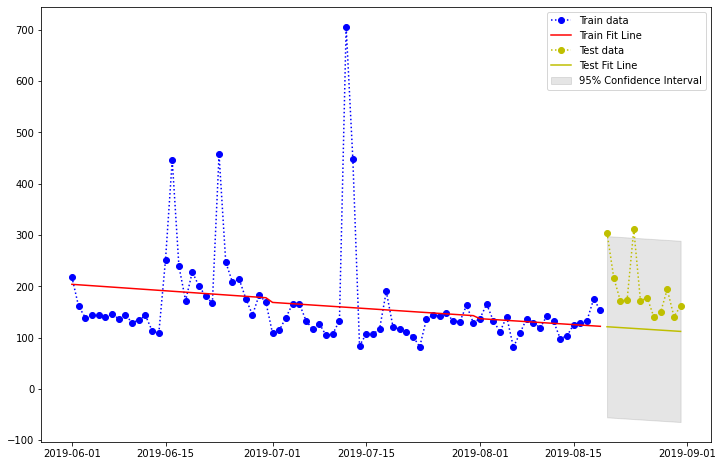

In [326]:
plt.figure(figsize = (12,8))
plt.plot(train2['Date'], train2['Sales'], 'bo:')
#sb.scatterplot('Years', 'Sales', data = train, hue = 'month', s= 200, palette='Set2')
plt.plot(train2['Date'], train2['fitted value'], 'r')
plt.plot(test2['Date'], test2['Sales'], 'yo:')
#sb.scatterplot('Years', 'Sales', data = test, hue = 'month', s = 200, palette = 'Set2')
plt.plot(test2['Date'],test2['forcast_fitted'], 'y' )
plt.fill_between(test2['Date'], (upper), (lower), alpha = 0.1, color = 'black')
plt.legend(['Train data','Train Fit Line','Test data','Test Fit Line','95% Confidence Interval'])
plt.show()